In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import numpy as np 
import matplotlib.pyplot as plt
import keras


In [23]:
x_train = np.loadtxt('input.csv',delimiter = ',')
y_train = np.loadtxt('labels.csv',delimiter = ',')
x_test = np.loadtxt('input_test.csv',delimiter = ',')
y_test = np.loadtxt('labels_test.csv',delimiter = ',')


[[ 37.  39.  25. ...  58.  54.  29.]
 [131. 128. 135. ...  71.  96.  74.]
 [ 80.  92.  88. ... 124. 119.  99.]
 ...
 [231. 226. 230. ...  62.  65.  72.]
 [ 61.  61.  63. ... 135. 123. 123.]
 [ 64.  31.  12. ...  61.  49.  35.]]


In [3]:
print("shape_of x_train: ",x_train.shape)
#2000 represents the total number of images
#3000(100 *100 image size and it is 3d so *3)

shape_of x_train:  (2000, 30000)


In [4]:
 x_train = x_train.reshape(len(x_train), 100 , 100 , 3)
 y_train = y_train.reshape(len(y_train), 1)
 x_test = x_test.reshape(len(x_test), 100 , 100 , 3)
 y_test = y_test.reshape(len(x_test), 1)
x_train = x_train /255.0
x_test = x_test /255.0

In [5]:
x_train[1,:] 
#printing single image data
#for rgb image value rangle from 0 to 255 to to train we need to rescale the value between 0 To 1

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(2000, 100, 100, 3)
(2000, 1)
(400, 100, 100, 3)
(400, 1)


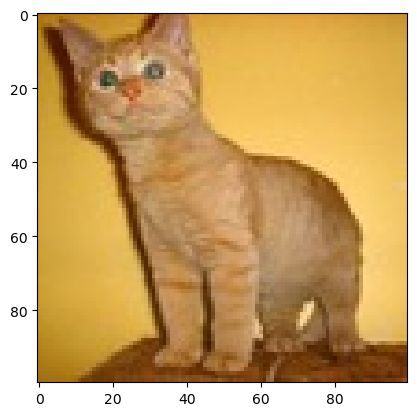

In [7]:
#to print random image from the train dataset 
import random
idx = random.randint(0, len(x_train))
plt.imshow(x_train[idx, :])


# model

In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    #32 is the number of filters and (3,3 is the size of the filter)

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    #dense layer means fully connected layers
    # in first dense 64 represents the number of neurons in the layer
    #1 because this is binary classification

    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid') #final fullyconnected layer also called output layer
])

In [9]:
# from tensorflow.keras import optimizers

# opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [10]:
#training model
model.fit(x_train , y_train , epochs = 5 , batch_size = 64)

Epoch 1/5


32/32 [==============================] - 5s 126ms/step - loss: 0.7961 - accuracy: 0.5095
Epoch 2/5
32/32 [==============================] - 4s 124ms/step - loss: 0.6804 - accuracy: 0.5845
Epoch 3/5
32/32 [==============================] - 4s 128ms/step - loss: 0.6466 - accuracy: 0.6430
Epoch 4/5
32/32 [==============================] - 4s 130ms/step - loss: 0.6007 - accuracy: 0.6735
Epoch 5/5
32/32 [==============================] - 4s 133ms/step - loss: 0.5565 - accuracy: 0.7305


In [11]:
#again doing this to improve the accuracy from the previous 
#doing this will resume from where it was end before

In [12]:
model.fit(x_train , y_train , epochs = 5 , batch_size = 64)

Epoch 1/5
32/32 [==============================] - 4s 127ms/step - loss: 0.4879 - accuracy: 0.7720
Epoch 2/5
32/32 [==============================] - 4s 130ms/step - loss: 0.4267 - accuracy: 0.8010
Epoch 3/5
32/32 [==============================] - 4s 128ms/step - loss: 0.3584 - accuracy: 0.8485
Epoch 4/5
32/32 [==============================] - 4s 125ms/step - loss: 0.2990 - accuracy: 0.8770
Epoch 5/5
32/32 [==============================] - 4s 129ms/step - loss: 0.2478 - accuracy: 0.9045


NameError: name 'accuracy' is not defined

In [13]:
model.evaluate(x_test , y_test)

13/13 [==============================] - 0s 21ms/step - loss: 0.7748 - accuracy: 0.6725


[0.7748191952705383, 0.6725000143051147]

# making predction


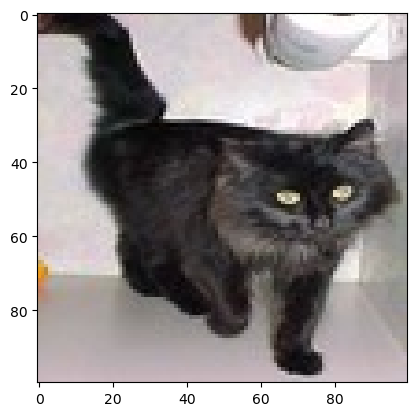

1/1 [==============================] - 0s 103ms/step
our model says it is :  dog


In [14]:
idx2 = random.randint( 0 , len(y_test))
plt.imshow(x_test[idx2, :])
plt.show()

y_pred = model.predict(x_test[idx2, :].reshape(1,100,100,3))
y_pred = y_pred > 0.5
if(y_pred == 0):
    pred = 'dog'
else:
    pred ='cat'
    
print("our model says it is : ", pred)

In [16]:
plt.plot(range(10, 91, 10), accuracy, label='Train Accuracy')
plt.plot(range(10, 91, 10), test_accuracies, label='Test Accuracy')
plt.title('Train/Test Accuracy vs. Train-Test Split Ratio')
plt.xlabel('Train-Test Split Ratio (%)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

NameError: name 'accuracy' is not defined